In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Model ve Tahmin

In [4]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [5]:
rf_model

RandomForestClassifier()

In [6]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [7]:
rf = RandomForestClassifier()

In [8]:
rf_params = {"n_estimators": [100, 200, 500, 1000],
             "max_features": [3,5,7,8],
             "min_samples_split": [2,5,10,20],
             }

In [9]:
rf_cv_model = GridSearchCV(rf,rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [10]:
rf_cv_model.best_params_

{'max_features': 8, 'min_samples_split': 5, 'n_estimators': 500}

In [12]:
rf_tuned = RandomForestClassifier(max_features=8, min_samples_split=5, n_estimators=500)

In [13]:
rf_tuned = rf_tuned.fit(X_train, y_train)

In [14]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_features=3, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_features=3, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_features=3, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_features=3, min_samples_split=5, n_estimators=1000; total time=   3.2s
[CV] END max_features=3, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_features=3, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_features=3, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END max_features=3, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_features=3, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_features=3, min_samples_split=20, n_estimators=100; total time=   0.3s
[CV] END max_features=3, min_samples_split=20, n_estimators=100; total time=   

[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_features=3, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_features=3, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_features=3, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_features=3, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END max_features=3, min_samples_split=5, n_estimators=1000; total time=   3.1s
[CV] END max_features=3, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_features=3, min_samples_split=10, n_estimators=1000; total time=   3.1s
[CV] END max_features=3, min_samples_split=20, n_estimators=500; total time=   1.5s
[CV] END max_features=3, min_samples_split=20, n_estimators=1000; total time=   3.0s
[CV] END max_features=5, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_features=5, min_samples_split=2, n_estimators=1000; total time=   

[CV] END max_features=3, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_features=3, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_features=3, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_features=3, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END max_features=3, min_samples_split=5, n_estimators=1000; total time=   3.1s
[CV] END max_features=3, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_features=3, min_samples_split=10, n_estimators=1000; total time=   3.1s
[CV] END max_features=3, min_samples_split=20, n_estimators=500; total time=   1.5s
[CV] END max_features=3, min_samples_split=20, n_estimators=1000; total time=   3.1s
[CV] END max_features=5, min_samples_split=2, n_estimators=500; total time=   1.8s
[CV] END max_features=5, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END max_features=5, min_samples_split=5, n_estimators=500; total time=   

[CV] END max_features=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_features=3, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_features=3, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_features=3, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_features=3, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_features=3, min_samples_split=5, n_estimators=500; total time=   1.6s
[CV] END max_features=3, min_samples_split=5, n_estimators=1000; total time=   3.2s
[CV] END max_features=3, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_features=3, min_samples_split=10, n_estimators=1000; total time=   3.1s
[CV] END max_features=3, min_samples_split=20, n_estimators=500; total time=   1.5s
[CV] END max_features=3, min_samples_split=20, n_estimators=1000; total time=   3.0s
[CV] END max_features=5, min_samples_split=2, n_estimators=500; total time=   1

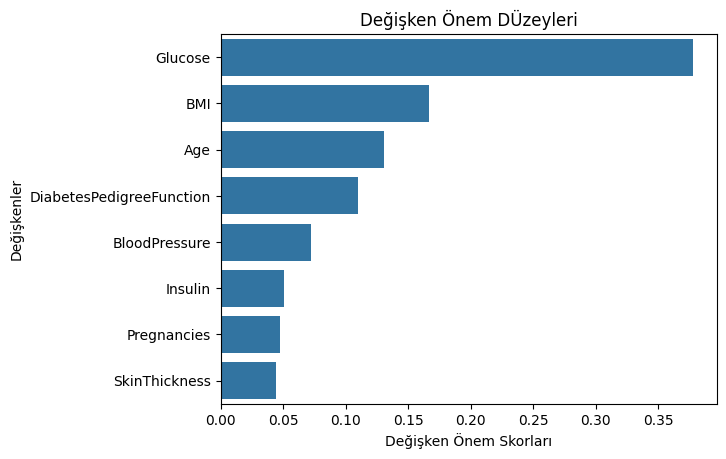

In [17]:
# degisken onem duzeyleri

feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem DÜzeyleri")
plt.show()